In [1]:
pip list

Package                      Version             
---------------------------- --------------------
absl-py                      1.4.0               
asttokens                    2.2.1               
astunparse                   1.6.3               
attrs                        19.3.0              
Automat                      0.8.0               
Babel                        2.6.0               
backcall                     0.2.0               
blinker                      1.4                 
cachetools                   5.3.1               
certifi                      2019.11.28          
chardet                      3.0.4               
Click                        7.0                 
cloud-init                   22.3.4              
colorama                     0.4.3               
comm                         0.1.3               
command-not-found            0.3                 
configobj                    5.0.6               
constantly                   15.1.0              


In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv("/home/ubuntu/workspace/airline-passengers.csv")

In [4]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


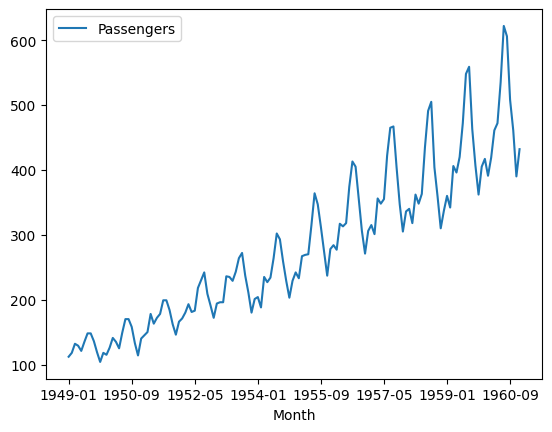

In [5]:
import matplotlib.pyplot as plt
df.plot(x="Month", y="Passengers")
plt.show()

## Prepocessing


In [6]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

2023-06-08 01:59:04.837201: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 01:59:04.873951: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 01:59:04.874268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 01:59:05.465463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [8]:

training_set = df.iloc[:45, 1:2].values
test_set = df.iloc[45:, 1:2].values

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 45):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [10]:

xtrainbaru = np.reshape(X_train, (40, 5))

In [11]:
## KNN 
# Mengimpor kelas KNeighborsRegressor dari modul sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

# Membuat objek KNeighborsRegressor dengan parameter n_neighbors=3
neigh = KNeighborsRegressor(n_neighbors=3)

# Melatih model KNN dengan menggunakan data pelatihan xtrainbaru dan y_train
modelknn = neigh.fit(xtrainbaru, y_train)



In [12]:

# Definisikan dataset_train dan dataset_test
dataset_train = df.iloc[:45, 1:2]  # Menggunakan 45 baris pertama sebagai data latihan
dataset_test = df.iloc[45:, 1:2]  # Menggunakan baris setelah 45 sebagai data uji

# Menggabungkan dataset_train dan dataset_test
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)

# Mengambil input dari dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values

In [13]:
inputs = inputs.reshape(-1,1)


In [14]:

# Melakukan transformasi skalar pada data inputs
inputs = sc.fit_transform(inputs)

# Inisialisasi list untuk menyimpan data uji yang telah diolah
X_test = []

# Mengambil subset data sepanjang 5 nilai sebelumnya
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])

# Mengubah list menjadi array NumPy
X_test = np.array(X_test)

# Mengubah bentuk array X_test menjadi (jumlah_sampel, panjang_waktu, 1)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Menampilkan bentuk dari X_test
print(X_test.shape)


(19, 5, 1)


In [15]:
xtestbaru = np.reshape(X_test, (19, 5))


In [16]:
# Melakukan prediksi pada data xtestbaru menggunakan model KNN
predicted_pakan = modelknn.predict(xtestbaru)

# Mengubah bentuk prediksi menjadi bentuk awal
predicted_pakan = predicted_pakan.reshape(-1, 1)

# Mengembalikan prediksi ke skala aslinya
prediksi = sc.inverse_transform(predicted_pakan)

# Membatasi dataset_test menjadi 19 baris
dataset_test = dataset_test.iloc[0:19]


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

# Hitung MAPE antara dataset_test dan prediksi
mape = mean_absolute_percentage_error(dataset_test, prediksi)

# Tampilkan hasil MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.2788677691833967


In [18]:
# Mengubah dataset_test menjadi array NumPy
dataset_test = dataset_test.to_numpy()

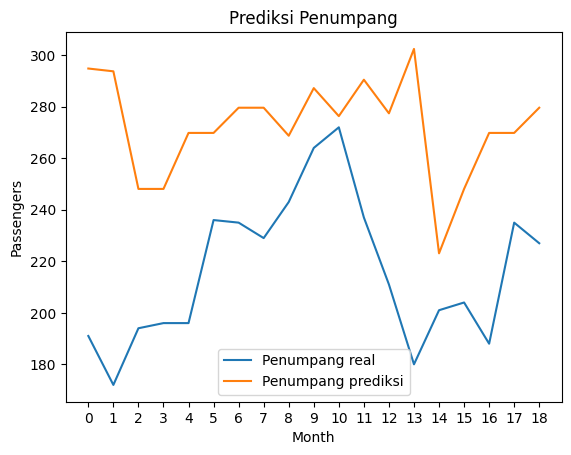

In [19]:
# Menampilkan plot data aktual (dataset_test) dan prediksi (prediksi)
plt.plot(dataset_test, label='Penumpang real')
plt.plot(prediksi, label='Penumpang prediksi')

# Menentukan lokasi sumbu x yang ditampilkan
plt.xticks(np.arange(0, 19, 1))

# Menambahkan judul plot
plt.title('Prediksi Penumpang')

# Menambahkan label sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Passengers')

# Menampilkan legenda pada plot
plt.legend()

# Menampilkan plot
plt.show()